# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import hashlib
from tqdm import tqdm
from zipfile import ZipFile

file = 'traffic-signs-data.zip'

with ZipFile(file) as zipf:
    filenames_pbar = tqdm(zipf.namelist(), unit='files')
    for filename in filenames_pbar:
        print(filename)
        if filename == 'train.p':
            training_file = filename
        elif filename == 'valid.p':
            validation_file = filename
        else:
            testing_file = filename

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

100%|██████████| 3/3 [00:00<00:00, 3057.07files/s]

test.p
train.p
valid.p


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Used numpy methods to fill the data 

import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

n_valid = X_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of Validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of Validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

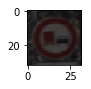

10


In [3]:
# Random Visualize the German Traffic Signs Dataset
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()
print(y_train[index])

### Training DataSet Summary visulization 

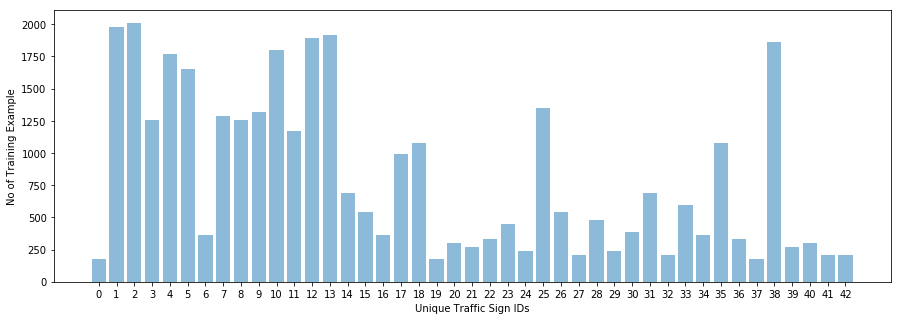

In [4]:
# Unique Traffic Sign Id and no of Training Example Available
unique, counts = np.unique(y_train, return_counts=True)
y_pos= np.arange(len(unique))
plt.figure(figsize=(15,5))
plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.xlabel('Unique Traffic Sign IDs')
plt.ylabel('No of Training Example')
plt.show()

### Pre-process the Data Set (normalization, grayscale, etc.)

In [5]:
# Suffle the data

from sklearn.utils import shuffle
import tensorflow as tf
import cv2

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)


### Grayscale and Normalization

Mean of Traning data set Image  0.356995258115
Mean of Validation data set Image 0.359618466831
Mean of Test data set Image 0.354988184159


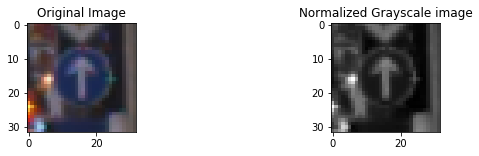

In [6]:
# Grayscale and Normalization of Training, Validation and Test Set

import tensorflow as tf
import cv2
from skimage import exposure
import warnings

X_train_gray = []
X_valid_gray = []
X_test_gray = []
a = 0.1
b = 0.9
x_min = 0
x_max = 255

# DO operation for Train data set

def image_gray_and_norm(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # converting to RGB to GrayScale 
    norm_gray_img = a + ((gray_img - x_min)*(b-a)/(x_max -x_min)) # Normalizing the GrayScale image
    return norm_gray_img

for i in range(len(X_train)):
    img = image_gray_and_norm(X_train[i])
    X_train_gray.append(img)
    
X_train_gray = np.array(X_train_gray)
X_train_gray = np.expand_dims(X_train_gray, axis=3)

# DO operation for Validation data set
for i in range (len(X_valid)):
    img = image_gray_and_norm(X_valid[i])
    X_valid_gray.append(img)
    
X_valid_gray = np.array(X_valid_gray)
X_valid_gray = np.expand_dims(X_valid_gray, axis=3)

# DO operation for Test data set
for i in range (len(X_test)):
    img = image_gray_and_norm(X_test[i])
    X_test_gray.append(img)

X_test_gray = np.array(X_test_gray)
X_test_gray = np.expand_dims(X_test_gray, axis=3)    
    
print("Mean of Traning data set Image ", np.mean(X_train_gray))
print("Mean of Validation data set Image", np.mean(X_valid_gray))
print("Mean of Test data set Image", np.mean(X_test_gray))

# Plotting Randomly normalized Grayscale image of Training data set
index = random.randint(0, len(X_train))

fig, axs = plt.subplots(1,2, figsize=(10, 2))
axs[0].imshow(X_train[index].squeeze())
axs[0].set_title('Original Image')
axs[1].imshow(X_train_gray[index].squeeze(), cmap='gray')
axs[1].set_title('Normalized Grayscale image')


### Image Augumentation
Creating Four function of Augumentating the dataset :  random_translate, random_scale, random_warp, and random_brightness

Input Image Shape : (32, 32, 1)  Output Translated image shape (32, 32, 1)
Input Image Shape : (32, 32, 1)  Output Scaled image Shape  (32, 32, 1)
Input Image Shape : (32, 32, 1)  Output Wrap image shape (32, 32, 1)
Input Image Shape : (32, 32, 1)  Output Brightness image Shape (32, 32, 1)


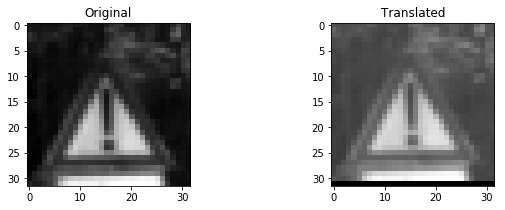

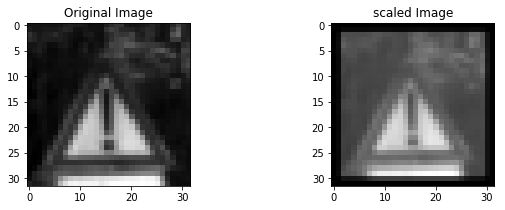

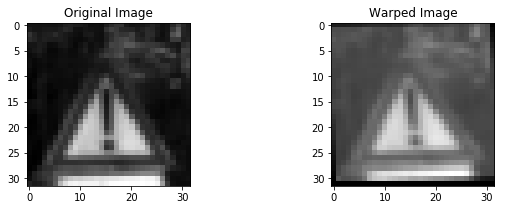

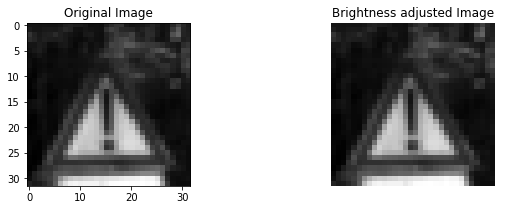

In [7]:
# Random Transalate 
import cv2

def random_image_translate(img):
    width,height,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    x, y = np.random.randint(-px,px,2)
    Mat = np.float32([[1,0,x],[0,1,y]])
    destination = cv2.warpAffine(img,Mat,(height,width))
    destination = destination[:,:,np.newaxis]
    return destination

# Plot Image. Original Vs Translate

test_img = X_train_gray[600]
test_dst = random_image_translate(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Translated')
print("Input Image Shape :", test_img.shape, " Output Translated image shape", test_dst.shape)

# Random Scaling
def random_image_scaling(img):   
    width,height,_ = img.shape
    # Transform the limit
    px = np.random.randint(-2,2)
    # End locations of Image
    pts1 = np.float32([[px, px],[width-px, px],[px, height-px],[width-px, height-px]])
    # Starting locations of image 
    pts2 = np.float32([[0,0], [width,0], [0, height], [width, height]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    destination = cv2.warpPerspective(img,M,(width, height))
    destination = destination[:,:,np.newaxis]
    return destination

#Plot Image. Original Vs Scaled
test_dst = random_image_scaling(test_img)    
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled Image')
print("Input Image Shape :", test_img.shape, " Output Scaled image Shape ", test_dst.shape)


# Random Wrap
def random_image_warp(img):
    
    width,height,_ = img.shape
    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= height * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= width * 0.06
    # 3 starting points for transform, 1/4 way from edges
    x1 = height/4
    x2 = 3*height/4
    y1 = width/4
    y2 = 3*width/4
    pts1 = np.float32([[y1,x1],[y2,x1],[y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]], [y2+rndy[1],x1+rndx[1]], [y1+rndy[2],x2+rndx[2]]])
    Mat = cv2.getAffineTransform(pts1,pts2)
    destination = cv2.warpAffine(img,Mat,(height,width))
    destination = destination[:,:,np.newaxis]
    return destination

# Plot Image. Original Vs Wrap Image

test_dst = random_image_warp(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Warped Image')
print("Input Image Shape :", test_img.shape, " Output Wrap image shape", test_dst.shape)


# Random Brightness
def random_image_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    destination = shifted * coef - 1.0
    return destination

test_dst = random_image_brightness(test_img)

# Plot Image. Original Vs Brignt adjusted Image

fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Brightness adjusted Image')

print("Input Image Shape :", test_img.shape, " Output Brightness image Shape", test_dst.shape)

### New Dataset After Augumentation

In [8]:
#Adding Dataset after Augmenting

print('X, y shapes:', X_train_gray.shape, y_train.shape[0])

input_indices = []
output_indices = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_gray.shape[0])
            new_img = X_train_gray[class_indices[0][i % n_samples]]
            new_img = random_image_translate(random_image_scaling(random_image_warp(random_image_brightness(new_img))))
            X_train_gray = np.concatenate((X_train_gray, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
print('X, y shapes:', X_train_gray.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) 34799
X, y shapes: (46480, 32, 32, 1) (46480,)


Size of new training data set after Augumenting : (46480, 32, 32, 1) (46480,)
Size of Validation data set : (4410, 32, 32, 1) (4410,)


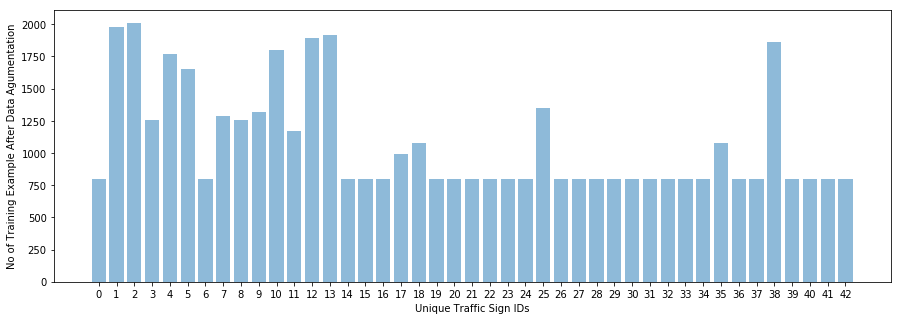

In [9]:
# New Histogram of Traffic Sign Id and no of Training Example Available Data Augmentation

unique, counts = np.unique(y_train, return_counts=True)
print('Size of new training data set after Augumenting :', X_train_gray.shape , y_train.shape)
print('Size of Validation data set :', X_valid_gray.shape , y_valid.shape)
y_pos= np.arange(len(unique))
plt.figure(figsize=(15,5))
plt.bar(unique, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.xlabel('Unique Traffic Sign IDs')
plt.ylabel('No of Training Example After Data Agumentation')
plt.show()

In [10]:
# Copy the Data into different Array
X_train_to_work = X_train_gray
y_train_to_work = y_train
X_valid_to_work = X_valid_gray
y_valid_to_work = y_valid

print(X_train_to_work.shape)
print(y_train_to_work.shape)

print(X_valid_to_work.shape)
print(y_valid_to_work.shape)

(46480, 32, 32, 1)
(46480,)
(4410, 32, 32, 1)
(4410,)


In [11]:
# Shuffing and add Validation data by spiliting 10% Training data Set and add in Validation data set
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train_to_work, y_train_to_work = shuffle(X_train_to_work, y_train_to_work)
X_train_to_work, X_temp_valid, y_train_to_work, y_temp_valid = train_test_split(X_train_to_work, y_train_to_work, 
                                                             test_size=0.10, random_state=42)
print("After splitting the data set :")
print(X_train_to_work.shape , y_train_to_work.shape )
print(X_temp_valid.shape , X_temp_valid.shape )

print("Original Validation data :" , X_valid_to_work.shape , y_valid_to_work.shape)

# Adding Additional Validation data set i
X_valid_to_work = np.concatenate((X_valid_to_work, X_temp_valid) , axis=0)
y_valid_to_work = np.concatenate((y_valid_to_work, y_temp_valid) , axis=0)
print("New Validation Data set after concatentation" , X_valid_to_work.shape, y_valid_to_work.shape)



After splitting the data set :
(41832, 32, 32, 1) (41832,)
(4648, 32, 32, 1) (4648, 32, 32, 1)
Original Validation data : (4410, 32, 32, 1) (4410,)
New Validation Data set after concatentation (9058, 32, 32, 1) (9058,)


In [12]:
#Final Data Set to work 
print("Final Data Set to work")
print("Training Data Set", X_train_to_work.shape , y_train_to_work.shape)
print("Validation Data Set", X_valid_to_work.shape, y_valid_to_work.shape)

Final Data Set to work
Training Data Set (41832, 32, 32, 1) (41832,)
Validation Data Set (9058, 32, 32, 1) (9058,)


### Model Architecture

### Setup TensorFlow

The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [13]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 64

### Implement the Multi Scale CNN network

Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture. This will be best fit for Traffic sign classifier.

I decided to use Multi-Scale Convolutional Networks, which was present by [Pierre Sermanet / Yann LeCun paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). This Architecture has 4 layers : 3 convolutional layers for feature extraction and one fully connected layer as a classifier.

### Input
The architecture accepts a 32x32xC image as input, where C is the number of color channels. Since Traffic Sign images are coverted into gray, C is 1 in this case.

### Architecture
Architecture in detail explained in write up. In Summary

a) Convolution layer : 3
b) Fully connected Layer : 1
c) Dropout before the output/logits layer


### Output
Return the result of the 2nd fully connected layer.

In [14]:
from tensorflow.contrib.layers import flatten

# Define probability to keep units
keep_prob = tf.placeholder(tf.float32)


# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
    
#Define weight and bias 
    
weights = {
    'wc1': tf.Variable(tf.truncated_normal([5,5,1,32], mean = mu , stddev = sigma)),# for gray image
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 32, 64], mean = mu , stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal([5, 5, 64, 128], mean = mu , stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([3584, 1024], mean = mu , stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([1024, 43], mean = mu , stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([32], mean = mu , stddev = sigma)),
    'bc2': tf.Variable(tf.truncated_normal([64], mean = mu , stddev = sigma)),
    'bc3': tf.Variable(tf.truncated_normal([128], mean = mu , stddev = sigma)),
    'bd1': tf.Variable(tf.truncated_normal([1024], mean = mu , stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([43], mean = mu , stddev = sigma))}

# Define the conv2d function

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# define the max pooling function

def maxpool2d(x, k):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# define the LeNet Model for Traffic sign classifier
def LeNet(x):    
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32. and relu activation
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = maxpool2d(conv1, k=2)
    
    #Layer 2: Convolutional. Input = 14x14x32.  Output = 10x10x64 and relu activation
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = maxpool2d(conv2, k=2)
     
    #Layer 3: Convolutional. Input = 5x5x64.  Output = 4x4x128 and relu activation
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    
    # Pooling. Input = 1x1x128. Output = 1x1x128.
    conv3 = maxpool2d(conv3, k=2)
    
    print('conv3 layer shape:', conv3)
    
    # Flatten of conv3 layer input = 4x4x128. Output = 2048.
    pool1 = flatten(conv3)
    print('pool1  shape:', pool1)
    
    # 1 more max pool of size and stride =2 , Input : 5X5X64 output = 2X2X64 
    conv2 = maxpool2d(conv2, k=2)
    # Flatten layer updated conv2 : input = 2x2x64 , Output = 256
    pool2 = flatten(conv2)
    print('pool2  shape:', pool2)
    
    # 1 more max pool of size and stride =4 , Input : 14x14x32 output = 3X3X64 
    conv1 = maxpool2d(conv1, k=4)
    # Flatten layer updated conv2 : input = 3X3X64  , Output = 576
    pool3 = flatten(conv1)
    
    print('pool3  shape:', pool3)
    
    flattened = tf.concat(1, [pool1, pool2, pool3])
    
    print('flattened  shape:', flattened)
    
    #print(fc0)
    
    # Layer 4: Fully Connected. Input = 960. Output = 1024.
    fc1 = tf.add(tf.matmul(flattened, weights['wd1']), biases['bd1'])
    
     # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Adding Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Ouptput Layer Input = 1024. Output = 43.
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return logits

## Features and Labels
Train LeNet to classify Traffic Sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # for gray image
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.


In [16]:
rate = 0.001
beta = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


conv3 layer shape: Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
pool1  shape: Tensor("Flatten/Reshape:0", shape=(?, 2048), dtype=float32)
pool2  shape: Tensor("Flatten_1/Reshape:0", shape=(?, 1024), dtype=float32)
pool3  shape: Tensor("Flatten_2/Reshape:0", shape=(?, 512), dtype=float32)
flattened  shape: Tensor("concat:0", shape=(?, 3584), dtype=float32)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [18]:
# Final Data set after image augemtation and split 
# Training Data Set : X_train_to_work, y_train_to_work 
# Validation Data set : X_valid_to_work, y_valid_to_work
val_acc =[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #num_examples = len(X_train)
    #num_examples = len(X_train_gray) # for gray scale image
    num_examples = len(X_train_to_work)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_to_work, y_train_to_work = shuffle(X_train_to_work, y_train_to_work)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_to_work[offset:end], y_train_to_work[offset:end] # for extended gray image training data
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.65})
            
        validation_accuracy = evaluate(X_valid_to_work, y_valid_to_work) # for gray image
        val_acc = np.append(val_acc, validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.852

EPOCH 2 ...
Validation Accuracy = 0.922

EPOCH 3 ...
Validation Accuracy = 0.935

EPOCH 4 ...
Validation Accuracy = 0.949

EPOCH 5 ...
Validation Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.960

EPOCH 7 ...
Validation Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.960

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.971

EPOCH 11 ...
Validation Accuracy = 0.966

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.964

EPOCH 14 ...
Validation Accuracy = 0.965

EPOCH 15 ...
Validation Accuracy = 0.969

EPOCH 16 ...
Validation Accuracy = 0.974

EPOCH 17 ...
Validation Accuracy = 0.965

EPOCH 18 ...
Validation Accuracy = 0.971

EPOCH 19 ...
Validation Accuracy = 0.971

EPOCH 20 ...
Validation Accuracy = 0.974

EPOCH 21 ...
Validation Accuracy = 0.978

EPOCH 22 ...
Validation Accuracy = 0.969

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accura

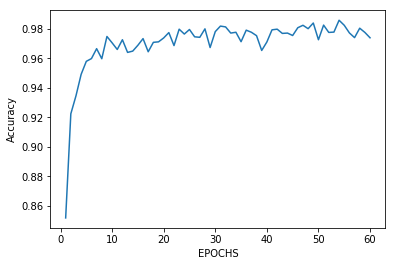

In [19]:
# Plotting the accuracy Vs Epoch Graph
x_epoch = []
for i in range(len(val_acc)):
        #x_epoch = np.array([i+1])
        x_epoch.append(i+1)
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.plot(x_epoch,val_acc)
plt.show()

### Evalute the Model on Test Data Set

In [20]:
print("Training data set size :", X_test_gray.shape, y_test)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training data set size : (12630, 32, 32, 1) [38 11  5 ..., 10 33 20]
Test Accuracy = 0.945


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Input Image Shape : (5, 32, 32, 3)
Ouput Image shape after Gray Scale and normalization:  (5, 32, 32, 1)
My German Sign Images:


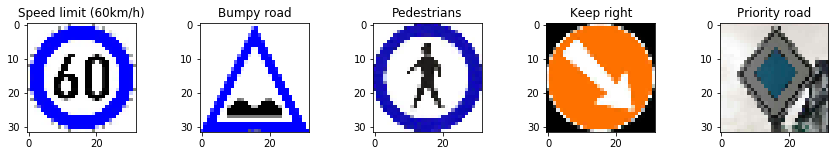

In [21]:
import cv2
import numpy as np
import os
import csv
from itertools import islice

my_images = []
my_images_org =[]
my_labels = [3,22,27,38,12]
signnames = {}

# Read the signnames and store in dictonary for future use 

with open('signnames.csv') as file:
    reader=csv.reader(file, skipinitialspace=True, quotechar="'")
    for row in islice(reader, 1, None):
        signnames[int(row[0])]=row[1:]

# Read the image and convert into format which need to given to neural net

for i, img in enumerate(os.listdir('My_Found_Traffic_Sign/')):
    image = cv2.imread('My_Found_Traffic_Sign/' + img)
    image_resize = cv2.resize(image,(32,32))
    my_images_org.append(image_resize)
    image_norm_gray = image_gray_and_norm(image_resize)
    my_images.append(image_norm_gray)
    
my_images = np.array(my_images)
my_images_org = np.array(my_images_org)
my_images = np.expand_dims(my_images, axis=3)
print("Input Image Shape :", my_images_org.shape)
print("Ouput Image shape after Gray Scale and normalization: ", my_images.shape )
print("My German Sign Images:")

# Plot the input Images 
fig, axs = plt.subplots(1,5, figsize=(15, 2))
for i in range(len(my_images_org)):
    axs[i].imshow(my_images_org[i].squeeze())
    axs[i].set_title(str(signnames[my_labels[i]][0]))

### Predict the Sign Type for Each Image

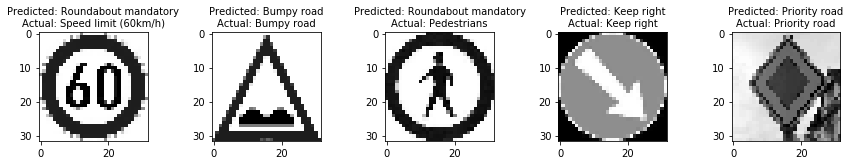

In [22]:
### Run the predictions here and use the model to output the prediction for each image.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_images, my_labels)
    #Get top 1 predicted class for each image
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 1),feed_dict={x: my_images, keep_prob:1.0})
    predicts = np.array(output[1])
    
    #Plotting the Graph 
    fig, axs = plt.subplots(1,5, figsize=(15, 2))
    for i in range(len(my_images)):
        axs[i].imshow(my_images[i].squeeze(), cmap='gray')
        axs[i].set_title("Predicted: " + str(signnames[predicts[i][0]][0]) \
                         + "\nActual: " + str(signnames[my_labels[i]][0]), fontsize=10)

### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
print("Test Accuracy = {:.1f}%".format(test_accuracy*100))

Test Accuracy = 60.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on my found the German traffic sign . 
#Show Top 5 softmax probabilities

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5),feed_dict={x: my_images, keep_prob:1.0})
    
    for i in range(len(output[0])):
        print("Image {0}:({1})".format(i+1, signnames[my_labels[i]][0]))
        print("Top 5 probabilites: {0}".format(output[0][i]))
        print("Top 5 indexes: {0}".format(output[1][i]))
        print()

Image 1:(Speed limit (60km/h))
Top 5 probabilites: [  9.74640489e-01   2.53551695e-02   4.27230134e-06   3.25634133e-08
   4.68785055e-09]
Top 5 indexes: [40 34 14  3 38]

Image 2:(Bumpy road)
Top 5 probabilites: [ 1.  0.  0.  0.  0.]
Top 5 indexes: [22  0  1  2  3]

Image 3:(Pedestrians)
Top 5 probabilites: [  1.00000000e+00   3.45818171e-20   3.30779611e-21   1.04122157e-21
   1.03542569e-23]
Top 5 indexes: [40 36 33 37 14]

Image 4:(Keep right)
Top 5 probabilites: [ 1.  0.  0.  0.  0.]
Top 5 indexes: [38  0  1  2  3]

Image 5:(Priority road)
Top 5 probabilites: [ 1.  0.  0.  0.  0.]
Top 5 indexes: [12  0  1  2  3]



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 